In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv('C:/Users/c_ksirisinahal/Desktop/Keerthana/Time_series/GEDataImportscountsbyhour.csv')
print(df.head())
df=df.iloc[:, 1:]
df.columns = ['Date', 'Count']
df.head(6)

   Unnamed: 0   timestamp_val  counts
0           1  2/27/2017 1:00       0
1           2  2/27/2017 2:00       0
2           3  2/27/2017 3:00       0
3           4  2/27/2017 8:00       0
4           5  2/27/2017 9:00      16


,Date,Count
0,2/27/2017 1:00,0
1,2/27/2017 2:00,0
2,2/27/2017 3:00,0
3,2/27/2017 8:00,0
4,2/27/2017 9:00,16
5,2/27/2017 10:00,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 2 columns):
Date     2870 non-null object
Count    2870 non-null int64
dtypes: int64(1), object(1)
memory usage: 33.7+ KB


In [4]:
df.dtypes

Date     object
Count     int64
dtype: object

In [5]:
df.Date=pd.to_datetime(df.Date)
df.dtypes

Date     datetime64[ns]
Count             int64
dtype: object

In [6]:
df.set_index('Date',inplace=True)
df.head()

,Count
Date,
2017-02-27 01:00:00,0
2017-02-27 02:00:00,0
2017-02-27 03:00:00,0
2017-02-27 08:00:00,0
2017-02-27 09:00:00,16


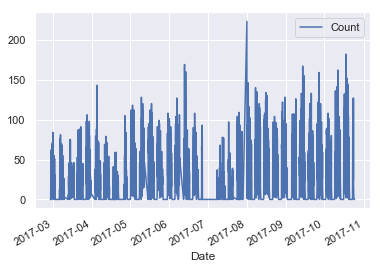

In [7]:
df.plot()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df['Count']
result = seasonal_decompose(ts, model='additive',freq=12)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2017-02-27 01:00:00          NaN
2017-02-27 02:00:00          NaN
2017-02-27 03:00:00          NaN
2017-02-27 08:00:00          NaN
2017-02-27 09:00:00          NaN
2017-02-27 10:00:00          NaN
2017-02-27 11:00:00    15.291667
2017-02-27 12:00:00    17.083333
2017-02-27 13:00:00    17.416667
2017-02-27 14:00:00    17.750000
2017-02-27 15:00:00    18.541667
2017-02-27 16:00:00    19.750000
2017-02-27 17:00:00    22.083333
2017-02-27 18:00:00    23.583333
2017-02-27 19:00:00    22.708333
2017-02-27 20:00:00    23.416667
2017-02-27 21:00:00    27.208333
2017-02-27 22:00:00    27.000000
2017-02-27 23:00:00    24.916667
2017-02-28 00:00:00    27.000000
2017-02-28 01:00:00    30.708333
2017-02-28 02:00:00    35.250000
2017-02-28 03:00:00    38.833333
2017-02-28 08:00:00    39.416667
2017-02-28 09:00:00    38.416667
2017-02-28 10:00:00    40.125000
2017-02-28 11:00:00    41.958333
2017-02-28 12:00:00    40.250000
2017-02-28 13:00:00    38.041667
2017-02-28 14:00:00    39.125000
     

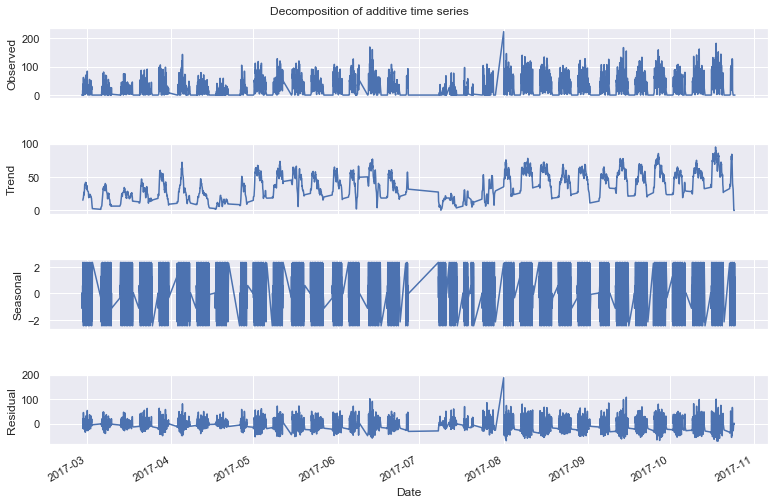

In [10]:
#decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')
fig = result.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [11]:
#Determine rolling statistics
rolmean = ts.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = ts.rolling(window=12).std()
print(rolmean,rolstd)

Date
2017-02-27 01:00:00          NaN
2017-02-27 02:00:00          NaN
2017-02-27 03:00:00          NaN
2017-02-27 08:00:00          NaN
2017-02-27 09:00:00          NaN
2017-02-27 10:00:00          NaN
2017-02-27 11:00:00          NaN
2017-02-27 12:00:00          NaN
2017-02-27 13:00:00          NaN
2017-02-27 14:00:00          NaN
2017-02-27 15:00:00          NaN
2017-02-27 16:00:00    13.833333
2017-02-27 17:00:00    16.750000
2017-02-27 18:00:00    17.416667
2017-02-27 19:00:00    17.416667
2017-02-27 20:00:00    18.083333
2017-02-27 21:00:00    19.000000
2017-02-27 22:00:00    20.500000
2017-02-27 23:00:00    23.666667
2017-02-28 00:00:00    23.500000
2017-02-28 01:00:00    21.916667
2017-02-28 02:00:00    24.916667
2017-02-28 03:00:00    29.500000
2017-02-28 08:00:00    24.500000
2017-02-28 09:00:00    25.333333
2017-02-28 10:00:00    28.666667
2017-02-28 11:00:00    32.750000
2017-02-28 12:00:00    37.750000
2017-02-28 13:00:00    39.916667
2017-02-28 14:00:00    38.916667
     

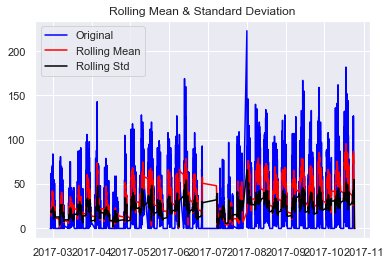

In [12]:
#Plot rolling statistics
orig = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
ts.dtype

In [13]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Count'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -5.924806e+00
p-value                        2.458015e-07
#Lags Used                     2.400000e+01
Number of Observations Used    2.845000e+03
Critical Value (1%)           -3.432651e+00
Critical Value (5%)           -2.862556e+00
Critical Value (10%)          -2.567311e+00
dtype: float64


## Log Transformation

C:\Users\c_ksirisinahal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


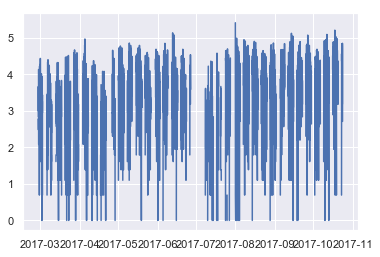

In [14]:
df_logScale = np.log(df)
plt.plot(df_logScale)

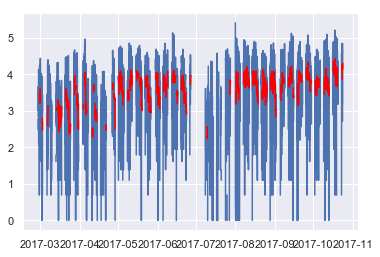

In [17]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

## Log scale - Moving averages

In [18]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Count
Date,
2017-02-28 11:00:00,0.680102
2017-02-28 12:00:00,0.829450
2017-02-28 13:00:00,0.524030
2017-02-28 14:00:00,-0.513321
2017-02-28 15:00:00,-0.113972
2017-02-28 16:00:00,0.776252
2017-02-28 17:00:00,-1.038713
2017-02-28 18:00:00,-0.314938
2017-02-28 19:00:00,0.206981


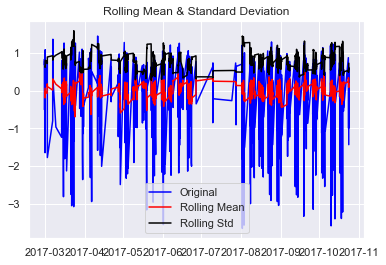

In [22]:
#Determine rolling statistics
rolmean1 = datasetLogScaleMinusMovingAverage.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd1 = datasetLogScaleMinusMovingAverage.rolling(window=12).std()
#print(rolmean1,rolstd1)

#Plot rolling statistics
orig1 = plt.plot(datasetLogScaleMinusMovingAverage, color='blue', label='Original')
mean1 = plt.plot(rolmean1, color='red', label='Rolling Mean')
std1 = plt.plot(rolstd1, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


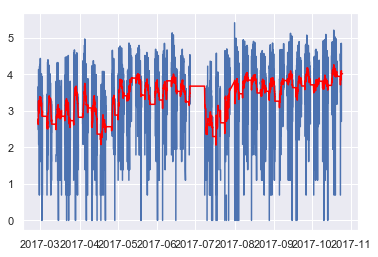

In [15]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

https://www.kaggle.com/chirag19/time-series-analysis-with-python-beginner
https://www.kaggle.com/residentmario/time-series-plotting-optional
https://www.kaggle.com/poiupoiu/how-to-use-sarimax
https://www.data-to-viz.com/graph/correlogram.html
http://site.iugaza.edu.ps/nbarakat/files/2010/02/Analysis_of_Time_Series_An_Introduction.pdf
https://github.com/zixiaojindao/time-series-survey/blob/master/time%20series/The%20Analysis%20of%20Time%20Series%20-%20An%20Introduction%206ed_Chris%20Chatfield.pdf
https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/